# Project in Healthcare domain
# Submitted by: Surya Teja Challapalli


# 1. Importing Python Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import skew

# 2. Read the data as a dataframe

In [2]:
ins=pd.read_csv('C:/Users/Surya-Rekha/Downloads/insurance.csv')
####Printing insurance data
print('\n Insurance data: \n',ins)


 Insurance data: 
       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
5      31  female  25.740         0     no  southeast   3756.62160
6      46  female  33.440         1     no  southeast   8240.58960
7      37  female  27.740         3     no  northwest   7281.50560
8      37    male  29.830         2     no  northeast   6406.41070
9      60  female  25.840         0     no  northwest  28923.13692
10     25    male  26.220         0     no  northeast   2721.32080
11     62  female  26.290         0    yes  southeast  27808.72510
12     23    male  34.400         0     no  southwest   1826.84300
13     56  female  39.820         0     no

# 3. Basic EDA

In [3]:
# a. Print Shape of data
print('Shape of data frame is:',ins.shape)
# b. Print datatypes of each attribute
print('Age column datatype:',ins['age'].dtype)
print('Sex column datatype:',ins['sex'].dtype)
print('BMI column datatype:',ins['bmi'].dtype)
print('Children column datatype:',ins['children'].dtype)
print('Smoker column datatype:',ins['smoker'].dtype)
print('Region column datatype:',ins['region'].dtype)
print('Charges column datatype:',ins['charges'].dtype)


Shape of data frame is: (1338, 7)
Age column datatype: int64
Sex column datatype: object
BMI column datatype: float64
Children column datatype: int64
Smoker column datatype: object
Region column datatype: object
Charges column datatype: float64


In [4]:
# c. Checking the presence of null/nan values in each column of dataframe
print('Count of null/nan values: \n',ins.isnull().sum())

Count of null/nan values: 
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [5]:
# d. 5 point summary of numerical attributes
print('5 point summary of numerical attributes: \n',ins.describe())

5 point summary of numerical attributes: 
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


Text(0.5, 1.0, 'Distribution of bmi')

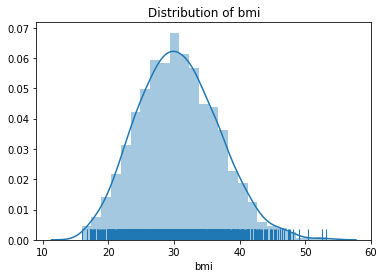

In [6]:
# e. Distribution of bmi, age and charges
bmi_dist=sns.distplot(ins['bmi'], hist=True, rug=True)
plt.title('Distribution of bmi')

Text(0.5, 1.0, 'Distribution of age')

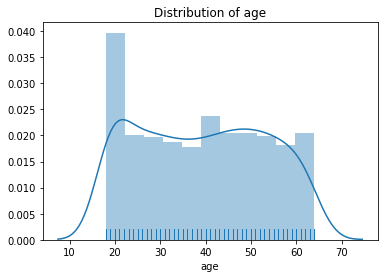

In [7]:
age_dist=sns.distplot(ins['age'], hist=True, rug=True)
plt.title('Distribution of age')

Text(0.5, 1.0, 'Distribution of charges')

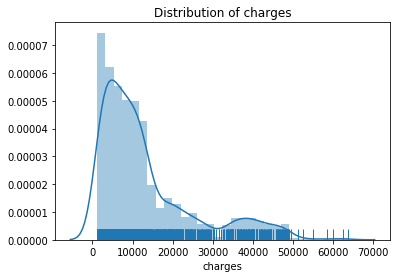

In [8]:
charges_dist=sns.distplot(ins['charges'], hist=True, rug=True)
plt.title('Distribution of charges')

In [9]:
# f. Skewness measure of bmi, age and charges
print('Skewness of bmi is:',skew(ins['bmi']))
print('Skewness of age is:',skew(ins['age']))
print('Skewness of charges is:',skew(ins['charges']))

Skewness of bmi is: 0.28372857291709386
Skewness of age is: 0.055610083072599126
Skewness of charges is: 1.5141797118745743


Text(0.5, 1.0, 'Presence of Outlier in bmi')

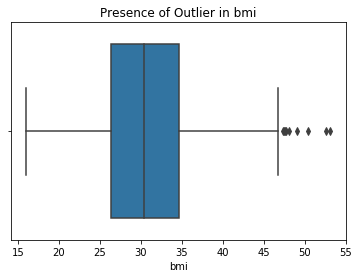

In [10]:
# g. Checking the presence of outliers in bmi, age and charges
sns.boxplot(ins["bmi"])
plt.title('Presence of Outlier in bmi')

Text(0.5, 1.0, 'Presence of Outlier in age')

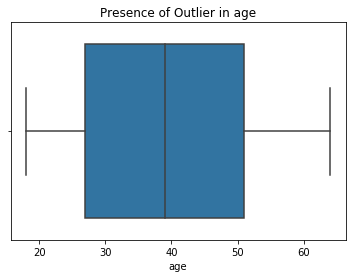

In [11]:
sns.boxplot(ins["age"])
plt.title('Presence of Outlier in age')

Text(0.5, 1.0, 'Presence of Outlier in charges')

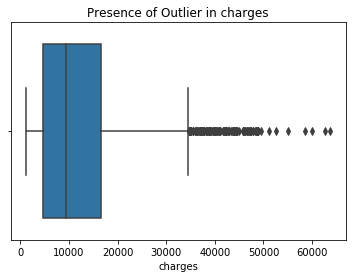

In [12]:
sns.boxplot(ins["charges"])
plt.title('Presence of Outlier in charges')

Text(0.5, 0.98, 'Distribution of categorical columns')

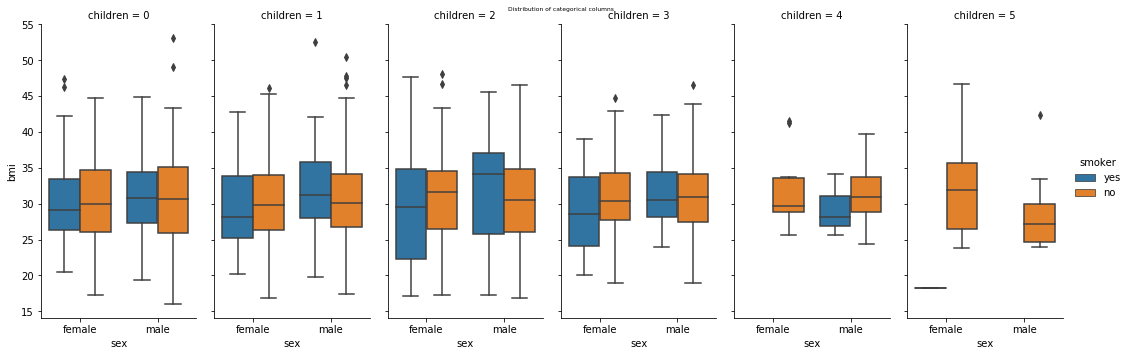

In [13]:
# h. Distribution of categorical columns (include children)
print("\n")
sns.catplot(x="sex", y="bmi", hue="smoker", col="children", data=ins, kind="box", height=5, aspect=.5)
plt.suptitle('Distribution of categorical columns', fontsize=6)

Text(0.5, 0.98, 'Pairplot of dataframe columns with smoker as hue')

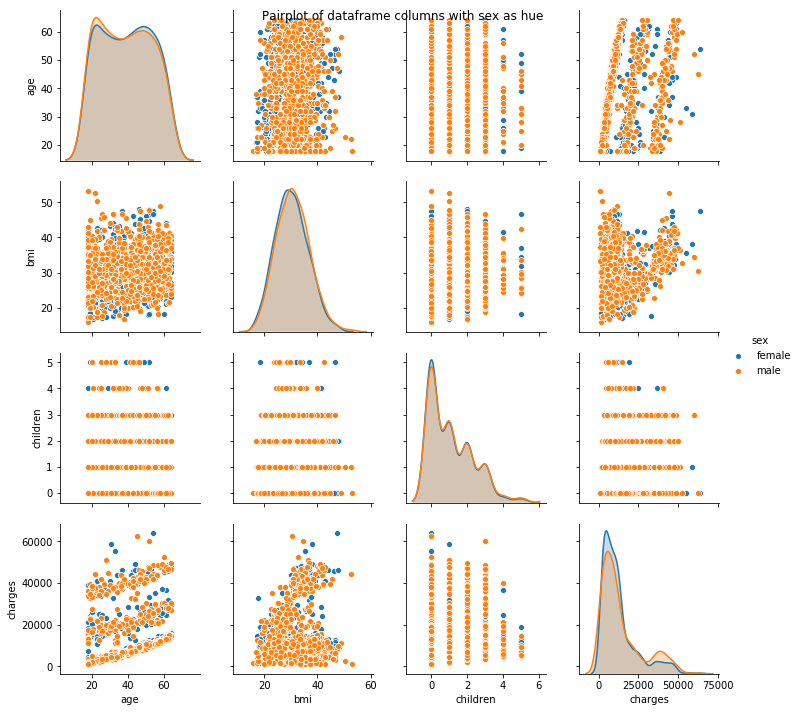

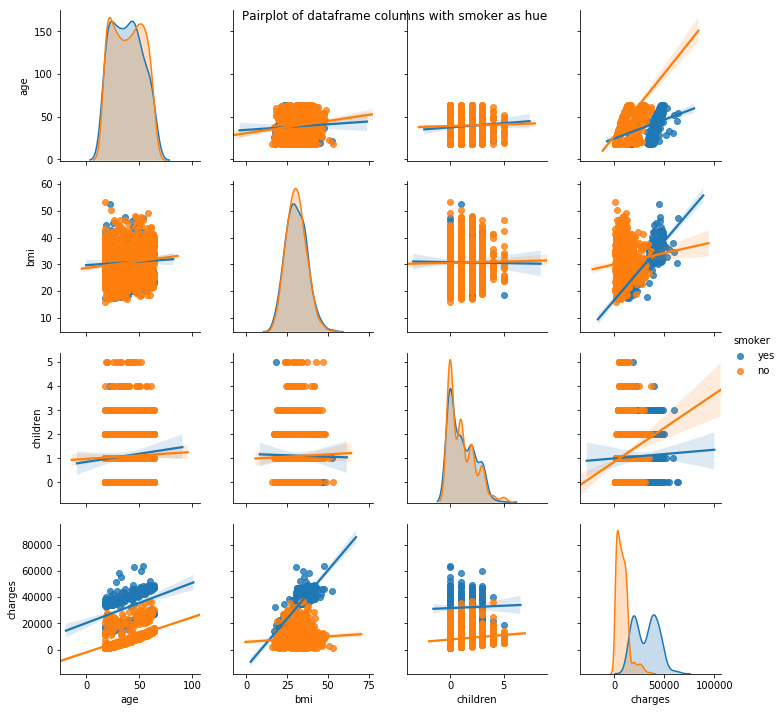

In [14]:
# i. Pairplot includes all columns of the dataframe
sns.pairplot(ins, hue="sex", kind="scatter")
plt.suptitle('Pairplot of dataframe columns with sex as hue')
sns.pairplot(ins, hue="smoker", kind="reg")
plt.suptitle('Pairplot of dataframe columns with smoker as hue')

# 4. Statistical Evidence

In [15]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# a. Do charges of people who smoke differ significantly  from the people who don't?

In [16]:
nineteen=ins[ins['age']==19]
nineteen.smoker.value_counts()

no     50
yes    18
Name: smoker, dtype: int64

In [17]:
sample_smokers=ins[ins['smoker']=='yes'].charges
sample_nonsmokers=ins[ins['smoker']=='no'].charges.iloc[:-32] ##excluding last 32 elements to match the two samples

In [18]:
var_smokers, var_nonsmokers=np.var(sample_smokers), np.var(sample_nonsmokers)
print('Variance of charges for smokers and nonsmokers are',[round(var_smokers,2)], [round(var_nonsmokers,2)])

Variance of charges for smokers and nonsmokers are [132721153.14] [36111593.61]


# Variance of charges for smokers are greater than nonsmokers, but are they differ significantly?

# Ho: Variation in charges of smokers and nonsmokers are same
# Ha: Variation in charges of smokers is greater than nonsmokers

In [19]:
n_smoker = 18 # no. of samples
dof = n_smoker-1 # degrees of freedom
alpha = 0.05 # Level of significance ie., 5%
chi_critic = 27.59 # Critical Chi-square value, from table
Ho = "Variation in charges of smokers and nonsmokers is equal" # Null hypothesis
Ha = "Variation in charges of smokers is greater than nonsmokers" # Alternate hypothesis

In [20]:
chi_calculated = (dof*var_smokers)/var_nonsmokers
print('Chi-squared calculated value is:',chi_calculated)

if chi_calculated < chi_critic:
    print("Since the test statistic is less than critical value, We fail to reject the null. Hence,", Ho)
else:
    print(f"Since the test statistic is more than critical value, We reject the null. Hence,", Ha)
    

Chi-squared calculated value is: 62.48020034227109
Since the test statistic is more than critical value, We reject the null. Hence, Variation in charges of smokers is greater than nonsmokers


# b. Does bmi of males differ significantly from that of  females?

In [21]:
nineteen.sex.value_counts()

male      35
female    33
Name: sex, dtype: int64

In [22]:
sample_male_bmi= ins[ins['sex']=='male'].bmi.iloc[:-2]
sample_female_bmi= ins[ins['sex']=='female'].bmi

In [23]:
v1, v2 = np.var(sample_male_bmi), np.var(sample_female_bmi)
print('Variances of bmi for male and female are', [round(v1),round(v2)])

Variances of bmi for male and female are [38, 36]


# Variation in bmi of male is greater than female, but are they significantly differ?

# Ho: Variation in bmi of male and female are equal
# Ha: Variation in bmi of male is greater than female

In [24]:
n_samples = 33 # no. of samples in a population
dof = n_samples-1 # Degrees of freedom
alpha = 0.05 # Level of significance
chi_critical = 46.19 # Critical Chi-square value, from table
Ho= "Variation in bmi of male and female are equal" # Null Hypothesis
Ha = "Variation in bmi of male is greater than female" # Alternate hypothesis

In [25]:
chisquare_calculated = (dof*v1)/v2
print('Chi-square calculated value is:', chisquare_calculated)

if chisquare_calculated < chi_critical:
    print("Since the test statistic is less than critical value, We fail to reject the null. Hence,", Ho)
else:
    print(f"Since the test statistic is more than critical value, We reject the null. Hence,", Ha)

Chi-square calculated value is: 33.02979773604549
Since the test statistic is less than critical value, We fail to reject the null. Hence, Variation in bmi of male and female are equal


# c. Is the proportion of smokers significantly different  in different genders?

# Test of proportions

In [26]:
#1. 'Smokers' and 'sex' are two categorical variables
#2. We want to see if proportion of smokers is significantly differ in both genders

# Ho: The proportions are equal
# Ha: The proportions are not equal

In [27]:
female_smokers= ins[ins['sex'] == 'female'].smoker.value_counts()[1] # No. of female smokers
male_smokers= ins[ins['sex'] == 'male'].smoker.value_counts()[1] # No. of male smokers
n_females= ins.sex.value_counts()[1] # No. of females in data
n_males= ins.sex.value_counts()[0] # No. of males in data
print('No. of male and female smokers:', [male_smokers, female_smokers])
print('No. of males and females in given data:', [n_males, n_females])
print(f'Proportions of smokers in male and female = {round(male_smokers/n_males,2)}, {round(female_smokers/n_females,2)} respectively')

No. of male and female smokers: [159, 115]
No. of males and females in given data: [676, 662]
Proportions of smokers in male and female = 0.24, 0.17 respectively


# Proportions are not equal, but are they statistically significant?

In [28]:
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([female_smokers, male_smokers],[n_females, n_males])

if pval < 0.05:
    print(f'Conclusion: With a p-value of {round(pval,4)}, the difference is significant ie., [We reject the null]')
else:
    print(f'Conclusion: With a p-value of {round(pval,4)}, the difference is not significant ie., [We fail to reject the null]')


Conclusion: With a p-value of 0.0053, the difference is significant ie., [We reject the null]


# d. Is the distribution of bmi across women with no  children, one child and two children, the same?

In [29]:
female_nochild_bmi=ins[(ins['sex']=='female') & (ins['children']==0)].bmi   ##Women bmi with no children
female_onechild_bmi=ins[(ins['sex']=='female') & (ins['children']==1)].bmi  ##Women bmi with one children
female_twochild_bmi=ins[(ins['sex']=='female') & (ins['children']==2)].bmi  ##Women bmi with two children

In [30]:
print('Count, Mean and Standard deviation of female BMI with no children: %3d, %3.2f and %3.2f' % (len(female_nochild_bmi), female_nochild_bmi.mean(), female_nochild_bmi.std()))
print('Count, Mean and Standard deviation of female BMI with one children: %3d, %3.2f and %3.2f' % (len(female_onechild_bmi), female_onechild_bmi.mean(), female_onechild_bmi.std()))
print('Count, Mean and Standard deviation of female BMI with two children: %3d, %3.2f and %3.2f' % (len(female_twochild_bmi), female_twochild_bmi.mean(), female_twochild_bmi.std()))

Count, Mean and Standard deviation of female BMI with no children: 289, 30.36 and 5.97
Count, Mean and Standard deviation of female BMI with one children: 158, 30.05 and 5.79
Count, Mean and Standard deviation of female BMI with two children: 119, 30.65 and 6.63


In [31]:
mean_bmi_df=pd.DataFrame()

df1=pd.DataFrame({'female_type':'Child=0', 'mean_bmi' :female_nochild_bmi})
df2=pd.DataFrame({'female_type':'Child=1', 'mean_bmi' :female_onechild_bmi})
df3=pd.DataFrame({'female_type':'Child=2', 'mean_bmi' :female_twochild_bmi})

mean_bmi_df=mean_bmi_df.append(df1)
mean_bmi_df=mean_bmi_df.append(df2)
mean_bmi_df=mean_bmi_df.append(df3)

In [32]:
mean_bmi_df

,female_type,mean_bmi
0,Child=0,27.900
5,Child=0,25.740
9,Child=0,25.840
11,Child=0,26.290
13,Child=0,39.820
20,Child=0,36.005
26,Child=0,23.085
31,Child=0,26.315
40,Child=0,26.600
47,Child=0,34.770


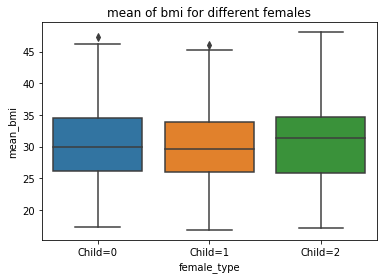

In [33]:
sns.boxplot(x= "female_type", y= "mean_bmi", data= mean_bmi_df)
plt.title('mean of bmi for different females')
plt.show()

# Hypothesis

# Ho: mu1=mu2=mu3
# Ha: Atleast one mu differs

# Level of significance, alpha = 0.05 (5%)
mu1, mu2, mu3 are mean bmi's of females with zero child, one child and two childs respectively.

Since we have three groups of females here and mean has to be determined, ANOVA test is needed based on p-value calculation.
# ANOVA Test

# Calculate p value using ANOVA

In [34]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('mean_bmi ~ female_type', data= mean_bmi_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                   sum_sq     df         F    PR(>F)
female_type     24.590123    2.0  0.334472  0.715858
Residual     20695.661583  563.0       NaN       NaN


# p-value (0.715858) is greater than alpha (0.05). 
Conclusion: Hence fail to reject null hypothesis ie., not statistically significant and there is difference in means.